<a href="https://colab.research.google.com/github/SamuelMiquirice/-TrabalhoDaDisciplinaDeMetodologiaDePesquisa_De_Samuel_RA202305/blob/main/Trabalho3_RA202305_SamuelAntonioMiquiriceDomindos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importa Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Importa as bibliotecas do Python

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

# %matplotlib inline
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

#### Ler o arquivo CSV

In [3]:
### Load the cv
# pacientes = pd.read_csv("/content/drive/MyDrive/10k_synthea_covid19_csv/patients.csv")
bp = pd.read_csv("/content/drive/MyDrive/bp.csv")
paired = pd.read_csv("/content/drive/MyDrive/paired.csv")


In [4]:
### Show informações sobre o csv
print(f"O arquivo bp.csv tem {bp.shape[0]} linhas e {bp.shape[1]} colunas")

### Imprime as linhas da tabela bp
bp

O arquivo bp.csv tem 200 linhas e 2 colunas


,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


In [5]:
print(f"O arquivo paired.csv tem {paired.shape[0]} linhas e {paired.shape[1]} colunas")

paired

O arquivo paired.csv tem 13 linhas e 3 colunas


,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


### Análise BP

In [6]:
# Separating into diabetics and non diabetics

bp_diabetic = bp[bp["type"] == "Yes"]["bp"]
bp_non_diabetic = bp[bp["type"] == "No"]["bp"]

In [7]:
# Mean and Median
bp.groupby("type").agg(["mean", "median"]).rename(index={"No": "Non-diabetic", "Yes": "Diabetic"})

bp       
                   mean median
type                          
Non-diabetic  69.545455   70.0
Diabetic      74.588235   76.0

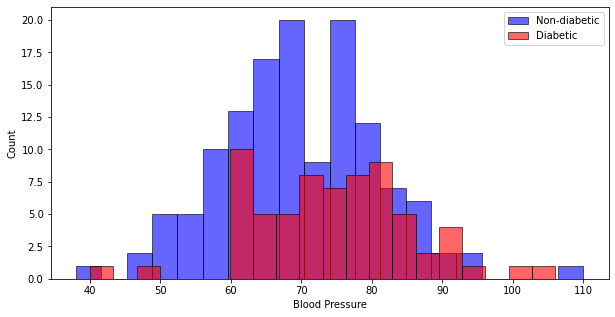

In [19]:
fig = plt.figure(figsize=(10,5))

plt.hist(bp_non_diabetic, bins=20, color='blue', edgecolor='black', label="Non-diabetic", alpha=0.6)
plt.hist(bp_diabetic, bins=20, color='red', edgecolor='black', label="Diabetic", alpha=0.6)
plt.xlabel("Blood Pressure")
plt.ylabel("Count")

plt.legend()
plt.show()

In [9]:
# T-test

stat, p = stats.ttest_ind(bp_diabetic, bp_non_diabetic)
print(f"stat: {stat}, p: {p}")

stat: 3.001495202122035, p: 0.0030323591864622732


In [10]:
# Wilcoxon rank sum

stat, p = stats.ranksums(bp_diabetic, bp_non_diabetic)
print(f"stat: {stat}, p: {p}")

stat: 3.045797809294312, p: 0.0023206383267846886


In [11]:
# Confidence interval via bootstrapping

bootstrap_ci_diabetic = stats.bootstrap((bp_diabetic,), np.mean, confidence_level=0.95,
                                        random_state=1, method='BCa').confidence_interval

bootstrap_ci_non_diabetic = stats.bootstrap((bp_non_diabetic,), np.mean, confidence_level=0.95,
                                            random_state=1, method='BCa').confidence_interval

print("Confidence Interval")
print(f"Diabetic: [{bootstrap_ci_diabetic.low}, {bootstrap_ci_diabetic.high}]")
print(f"Non Diabetic: [{bootstrap_ci_non_diabetic.low}, {bootstrap_ci_non_diabetic.high}]")

Confidence Interval
Diabetic: [71.77941176470588, 77.29411764705883]
Non Diabetic: [67.6590909090909, 71.47727272727273]


In [12]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

print(f"Cohen's D: {cohend(bp_diabetic, bp_non_diabetic)}")


Cohen's D: 0.4480342648766951


### Análise Paired

In [13]:
# Mean and Median
paired[["August", "November"]].agg(["mean", "median"])

,August,November
mean,11.423077,16.323077
median,10.000000,15.300000


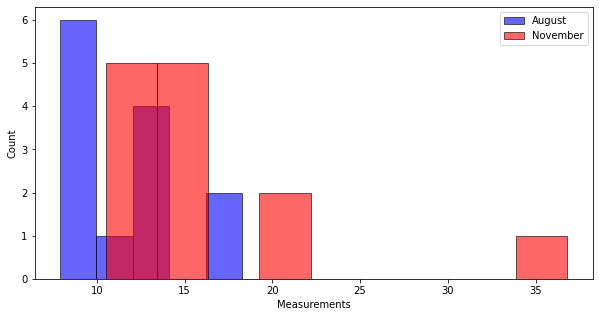

In [18]:
fig = plt.figure(figsize=(10,5))

plt.hist(paired["August"], bins="auto", color='blue', edgecolor='black', label="August", alpha=0.6)
plt.hist(paired["November"], bins="auto", color='red', edgecolor='black', label="November", alpha=0.6)
plt.xlabel("Measurements")
plt.ylabel("Count")
plt.legend()
plt.show()

In [15]:
# Paired T-test
stat, p = stats.ttest_rel(paired["August"], paired["November"])
print(f"stat: {stat}, p: {p}")

stat: -2.3088956550760438, p: 0.03955525086687241


In [16]:
# Paired Wilcoxon
stat, p = stats.wilcoxon(paired["August"], paired["November"])
print(f"stat: {stat}, p: {p}")

# test

stat: 16.0, p: 0.039794921875
